# push_swap 42 project

See `README.md` for the setup instructions. Don't worry if you don't have the checker, the only problem is that the correctness checks will be skipped.

Don't forget to run the cell with imports right below this text if you want to follow along!

In [11]:
import math
from plumbum import local
from prototypes.merge import dummy_merge_sort_steps
from prototypes.radix import dummy_radix_sort_steps, ternary_radix_sort_steps
from check import grade

## Task subject (briefly)

The goal of this project is to write an algo that produces steps to sort a sequence of numbers (numbers fit integer type and don't repeat). The given numbers are stored in a "stack" and you have another such "stack" at your disposal. The allowed operations are:

+ **sa** (swap a): Swap the first 2 elements at the top of stack a. Do nothing if there is only one or no elements.
+ **sb** (swap b): Swap the first 2 elements at the top of stack b. Do nothing if there is only one or no elements.
+ **ss** : sa and sb at the same time.
+ **pa** (push a): Take the first element at the top of b and put it at the top of a. Do nothing if b is empty.
+ **pb** (push b): Take the first element at the top of a and put it at the top of b. Do nothing if a is empty.
+ **ra** (rotate a): Shift up all elements of stack a by 1. The first element becomes the last one.
+ **rb** (rotate b): Shift up all elements of stack b by 1. The first element becomes the last one.
+ **rr** : ra and rb at the same time.
+ **rra** (reverse rotate a): Shift down all elements of stack a by 1. The last element becomes the first one.
+ **rrb** (reverse rotate b): Shift down all elements of stack b by 1. The last element becomes the first one.
+ **rrr** : rra and rrb at the same time.

The algo should be written in C. The created source should compile into a binary that takes the contents of the first stack (aka stack a) as a command line parameter (first number on top) and outputs the sorting steps, one step per line. The steps should result in all elements end up in stack a sorted  in ascending order. And you should strive to use as few steps as you can (more details on efficiency below).

## Example

The resulting binary will be called like this

```bash
ARG="2 1 3 6 5 8"; ./push_swap $ARG
```

It means that there are 6 numbers in stack a, number 2 is on top. Possible output is

```
sa
pb
pb
pb
sa
pa
pa
pa
```

## Efficiency requirements

I got this part from [another student-generated tutorial](https://medium.com/nerd-for-tech/push-swap-tutorial-fa746e6aba1e), the efficiency requirements aren't stated on the grading system.

The passing solution should be properly optimized for small amounts of elements:

+ use no more than 3 operations for 3 elements
+ use no more than 12 operations for 5 elements

The passing solution should also be effective in sorting bigger amounts of elements. Here is the table on how much steps you are allowed to use for each number of points.

| number of elements | 5 points | 4 points | 3 points | 2 points | 1 point |
|--------------------|----------|----------|----------|----------|---------|
| 100                | 700      | 900      | 1100     | 1300     | 1500    |
| 500                | 5500     | 7000     | 8500     | 10000    | 11500   |

According to unreliable sources it is required to get at least 6 points to pass.

There is also a non-explicit requirement on the amount of the processing time the program can use to generate the steps, I assume it is around a second.


## Efficiency observations

These requirements really force you to apply a lot of non-asymptotic optimizations to reduce the amount of steps in your output.

These requirements don't empathize the value of being asymptotically good.

You can be reasonably inefficient generating steps as long as you don't generate that many steps.

The amount of steps can't be lower than $Nlog_{k}N$ asymptotically, where $N$ is the length of the input sequence and $k = 11$ is the number of available operations each step.

### Proof for the solution length lower bound

For two different input sequences of the same length the answers should be different.

Number of possible input sequences with length $N$ is $N!$

Number of possible sorting sequences no longer then $w$ is $k^0 + k^1 + k^2 + ... + k^w$.

So we can get a lower bound for $w$ from:

$k^0 + k^1 + k^2 + ... + k^w \ge N!$

Given the lower bound for factorial:

$N! \ge \left(\frac{n}{e}\right)^n$

And given that $k = 11$ i. e. $k > 2$

$2 \cdot k ^ w \ge k^0 + k^1 + k^2 + ... + k^w$

it means

$2 \cdot k ^ w \ge \left(\frac{n}{e}\right)^n$

let's take logarithm from both sides

$ln(2) + w \cdot ln(k) \ge n(ln(n) - ln(e))$

more transformations

$w \cdot ln(k) \ge n \cdot ln(n) - n - ln(2)$

$w \ge n \cdot \frac{ln(n)}{ln(k)} - \frac{n - ln(2)}{ln(k)}$

$w \ge n \cdot ln_k(n) - \frac{n - ln(2)}{ln(k)}$

$w \ge n \cdot ln_k(n) - O(n)$

The idea of the proof was taken from [here](https://doi.org/10.1016/j.dam.2010.06.007)

### Calculating the solution length lower bound

Out of curiosity we can print the estimate based on this formula

In [4]:
def estimate_min_worst_case_length(data_length: int) -> int:
    n_possible_input_sequences = math.factorial(data_length)
    n_answer_sequences = 1
    min_worst_case_length = 0
    possible_operations = 11
    while n_answer_sequences < n_possible_input_sequences:
        min_worst_case_length += 1
        n_answer_sequences += possible_operations ** min_worst_case_length
    return min_worst_case_length

print("Minimal worst case scenario sorting length")
for i in range(11):
    print(f"{i:4}: {estimate_min_worst_case_length(i)}")
print(f"{100:4}: {estimate_min_worst_case_length(100)}")
print(f"{500:4}: {estimate_min_worst_case_length(500)}")
print(f"{1000:4}: {estimate_min_worst_case_length(1000)}")

Minimal worst case scenario sorting length
   0: 0
   1: 0
   2: 1
   3: 1
   4: 2
   5: 2
   6: 3
   7: 4
   8: 5
   9: 6
  10: 7
 100: 152
 500: 1089
1000: 2466


As we can notice this estimate is growing as expected and the difference between it and the requirements isn't that big.

## Small sequences optimization

I use dynamic programming to find optimal answers for short sequences. The idea is to look at all the possible states with the data of this length and find the shortest paths to the sorted state from every state. One can call it BFS on the states graph instead of DP.

First type of short sequence is the sequence that forms the whole input data.
The solutions are in prototypes/small/solutions/whole. Each file corresponds to length.

**TODO:** replace examples of sequences + answers by printing actual generated answers for sequences

```
0 1 2
0 2 1

```




```
0 1 2 ... ra ra ra
0 2 1 ... ra sa ra ra
1 0 2 ... sa ra ra ra
1 2 0 ... ra ra ra
2 0 1 ... pb ra ra pa ra
2 1 0 ... pb pb ra pa ra pa ra

... 0 1 2 rra rra rra

4 5 ... 3 - 2 1 0 rra pa pa pa 
```

## Algo comparison

So far finished algo's are dummy merge sort, dummy radix sort and ternary radix sort

In [12]:
for algo in [dummy_merge_sort_steps, dummy_radix_sort_steps, ternary_radix_sort_steps]:
    print(algo.__name__, end=": ")
    for count in [3, 5, 100, 500, 1000]:
        data = list(reversed(range(count)))
        current_grade = grade(data, algo(data))
        print(f"{count}={current_grade}", end="; ")
    print()

dummy_merge_sort_steps: 3=[OK] 15; 5=[OK] 39; 100=[OK] 1816; 500=[OK] 11328; 1000=[OK] 25156; 
dummy_radix_sort_steps: 3=[OK] 10; 5=[OK] 25; 100=[OK] 1084; 500=[OK] 6784; 1000=[OK] 15068; 
ternary_radix_sort_steps: 3=[OK] 6; 5=[OK] 16; 100=[OK] 898; 500=[OK] 6020; 1000=[OK] 13379; 


In [6]:
cat = local["cat"]

In [4]:

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import permutations
from typing import Callable
from check import grade
import cProfile
from prototypes.merge import dummy_merge_sort_steps
from prototypes.radix import dummy_radix_sort_steps

## All sequences with lengths 1-8

In [2]:
def run_all_up_to_max_len(algo: Callable[[list[int]], list[str]], max_len) -> list[int]:
    print(f"Grading {algo.__name__} on all permutations of lengths 1..{max_len}")
    worst_case_steps = [0 for _ in range(max_len + 1)]
    for data_len in tqdm(range(1, max_len + 1), desc="data length"):
        for data in tqdm(permutations([x for x in range(data_len)]),
                         desc=f"permutations for len {data_len}",
                         total=math.factorial(data_len)):
            solution = algo(data)
            res = grade(data, solution)
            if res.correctness == False:
                print(f"Error sorting {data} with {algo.__name__}")
            if res.length > worst_case_steps[data_len]:
                worst_case_steps[data_len] = res.length
    return worst_case_steps

## Reversed sequences

In [3]:
# generates tuple (x, y) for pyplot
# x is lengths
# y is numbers of steps to sort reversed sequence of this length
# start = minimum length, inclusive
# end = maximum length, inclusive
# inc = distance between lengths
def run_reversed(algo: Callable[[list[int]], list[str]], start, end, inc) -> list[int]:
    print(f"Grading {algo.__name__} on reversed sequences of length {start}..{end} with step {inc}")
    steps = []
    lens = []
    for data_len in tqdm(range(start, end + 1, inc), desc="data length"):
        data = list(reversed([x for x in range(data_len)]))
        solution = algo(data)
        steps.append(len(solution))
        lens.append(data_len)
    return (lens, steps)

## Dummy merge sort

In [6]:
data = list(reversed([x for x in range(100000)]))
cProfile.run('dummy_merge_sort_steps(data)')

         12339806 function calls in 3.093 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.008    0.008    3.093    3.093 <string>:1(<module>)
        1    2.082    2.082    3.086    3.086 merge.py:3(dummy_merge_sort_steps)
        1    0.000    0.000    3.093    3.093 {built-in method builtins.exec}
  2670960    0.212    0.000    0.212    0.000 {built-in method builtins.len}
   200012    0.046    0.000    0.046    0.000 {built-in method builtins.min}
  2570960    0.211    0.000    0.211    0.000 {method 'append' of 'collections.deque' objects}
  4326896    0.330    0.000    0.330    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        7    0.000    0.000    0.000    0.000 {method 'extend' of 'list' objects}
  2570960    0.205    0.000    0.205    0.000 {method 'popleft' of 'collections.deque' objects}
        7    0.00

In [ ]:
dummy_merge_sort_on_small_data = run_all_up_to_max_len(dummy_merge_sort_steps, 8)

Grading dummy_merge_sort_steps on all permutations of lengths 1..8


data length:   0%|          | 0/8 [00:00<?, ?it/s]

permutations for len 1:   0%|          | 0/1 [00:00<?, ?it/s]

permutations for len 2:   0%|          | 0/2 [00:00<?, ?it/s]

permutations for len 3:   0%|          | 0/6 [00:00<?, ?it/s]

permutations for len 4:   0%|          | 0/24 [00:00<?, ?it/s]

permutations for len 5:   0%|          | 0/120 [00:00<?, ?it/s]

permutations for len 6:   0%|          | 0/720 [00:00<?, ?it/s]

permutations for len 7:   0%|          | 0/5040 [00:00<?, ?it/s]

In [3]:
x, y = run_reversed(dummy_merge_sort_steps, 1, 10**6, 5000)

Grading dummy_merge_sort_steps on all reversed sequences of length 1..1000000


data length:   0%|          | 0/200 [00:00<?, ?it/s]

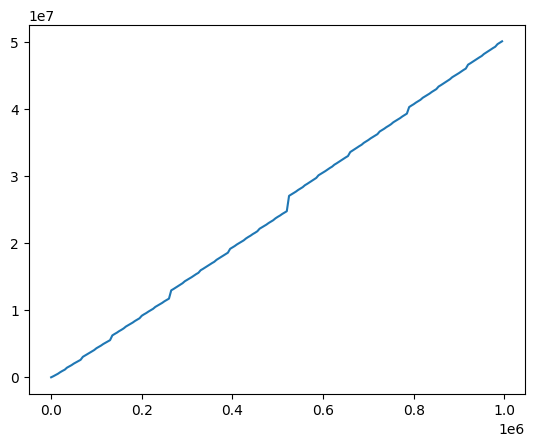

In [4]:
plt.plot(x, y)

In [5]:
print(y[-1])

50037840


## Dummy radix sort

In [7]:
data = [5, 4, 3, 2, 1]
solution = dummy_radix_sort_steps(data)
print(grade(data, solution))

[OK] 25


In [10]:
radix_small_steps = run_all_up_to_max_len(dummy_radix_sort_steps, 7)

Grading dummy_radix_sort_steps on all permutations of lengths 1..7


data length:   0%|          | 0/7 [00:00<?, ?it/s]

permutations for len 1:   0%|          | 0/1 [00:00<?, ?it/s]

permutations for len 2:   0%|          | 0/2 [00:00<?, ?it/s]

permutations for len 3:   0%|          | 0/6 [00:00<?, ?it/s]

permutations for len 4:   0%|          | 0/24 [00:00<?, ?it/s]

permutations for len 5:   0%|          | 0/120 [00:00<?, ?it/s]

permutations for len 6:   0%|          | 0/720 [00:00<?, ?it/s]

permutations for len 7:   0%|          | 0/5040 [00:00<?, ?it/s]

In [11]:
print(radix_small_steps)

[0, 2, 7, 10, 20, 25, 29, 33]


In [12]:
radix_x, radix_y = run_reversed(dummy_radix_sort_steps, 50, 500, 50)

Grading dummy_radix_sort_steps on all reversed sequences of length 1..500


data length:   0%|          | 0/10 [00:00<?, ?it/s]

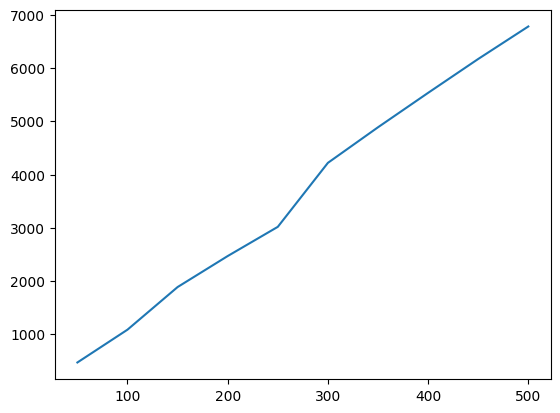

In [13]:
plt.plot(radix_x, radix_y)

In [14]:
print("  3:", radix_small_steps[3])
print("  5:", radix_small_steps[5])
print(f"{radix_x[1]}: {radix_y[1]}")
print(f"{radix_x[-1]}: {radix_y[-1]}")

  3: 10
  5: 25
100: 1084
500: 6784


## TODO

algos to implement:
- [ ] Quick sort
- [x] Dummy merge sort
- [ ] Optimized split in halves for merge sort
- [ ] Short sequences optimizations for merge sort
- [x] Dummy radix, see [tutorial](https://medium.com/nerd-for-tech/push-swap-tutorial-fa746e6aba1e) by Leo Fu
- [x] Ternary radix
- [ ] Short sequences optimizations for radix (i. e. radix sort on higher digits and fix order inside the group)
- [ ] [Mechanical turk sort](https://medium.com/@ayogun/push-swap-c1f5d2d41e97) by A. Yigit Ogun
- [ ] Sort by [Jamie Dawson](https://medium.com/@jamierobertdawson/push-swap-the-least-amount-of-moves-with-two-stacks-d1e76a71789a)
- [ ] Sort by [Mohamed Y. souiyeh](https://medium.com/@msouiyeh/not-your-typical-42network-push-swap-cc583f863a90)
- [ ] Sort by [Luca Fischer](https://medium.com/@lucafischer_11396/two-stacks-one-goal-understanding-the-push-swap-algorithm-e08e5986f657)